<a href="https://colab.research.google.com/github/Abyy98/Taskweek3Sun/blob/main/Copy_of_Ensemble_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Load the dataset


In [2]:
df = pd.read_csv('/content/Traffic_Jams.csv')

In [3]:
df.sample()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
816,12:00:00 PM,18,Wednesday,40,10,0,28,78,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [4]:
print(df.describe())

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  6324.000000  6324.000000  6324.000000  6324.000000  6324.000000   
mean     16.043327    64.355629    12.013283    12.557875    18.658128   
std       8.956907    44.307088    11.363955    12.319831    10.724822   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.000000     3.000000     1.000000    10.000000   
50%      16.000000    61.000000     9.000000    10.000000    18.000000   
75%      24.000000   101.250000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  6324.000000  
mean    107.584915  
std      55.850784  
min      21.000000  
25%      53.000000  
50%     103.000000  
75%     151.000000  
max     279.000000  


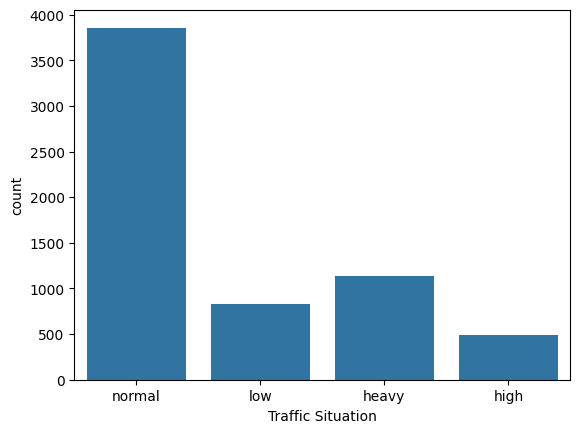

In [5]:
sns.countplot(x='Traffic Situation', data=df)
plt.show()


In [6]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high


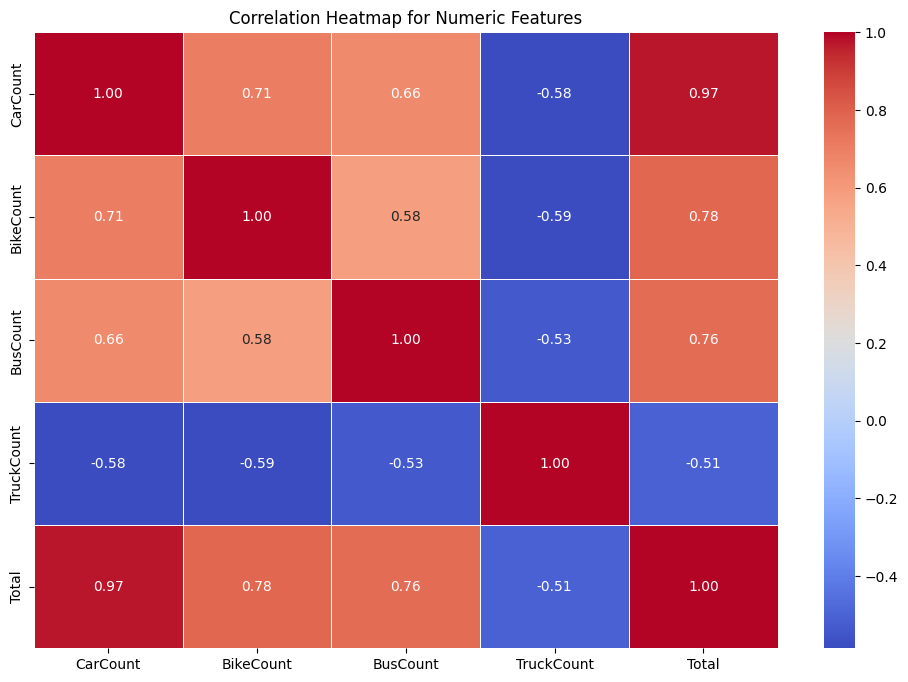

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [9]:
print(df.isnull().sum())

Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [10]:
missing_values = df.isnull().sum()

missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)


Columns with missing values:
 Series([], dtype: int64)


In [11]:
label_encoder = LabelEncoder()
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])




In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
scaler = StandardScaler()

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [7]:
columns_to_drop = ['Time', 'Date']
df.drop(columns=columns_to_drop, inplace=True)


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

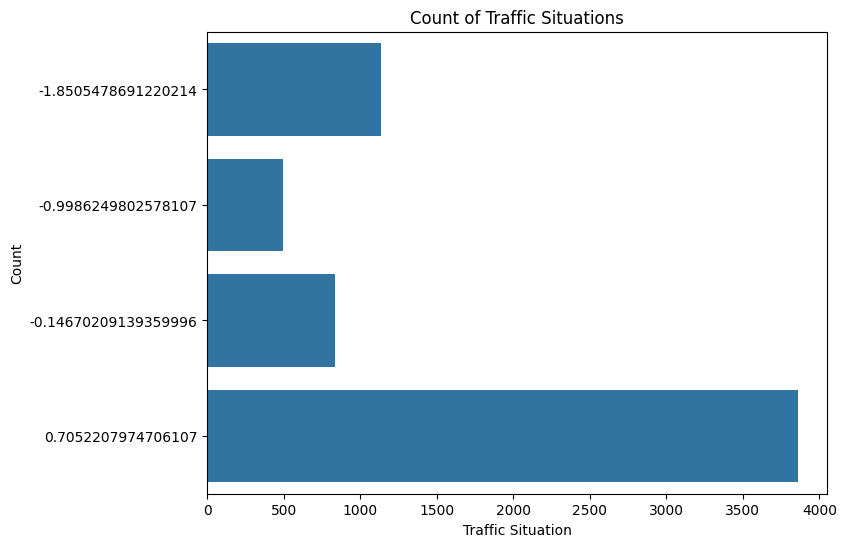

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(y='Traffic Situation', data=df)
plt.title('Count of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


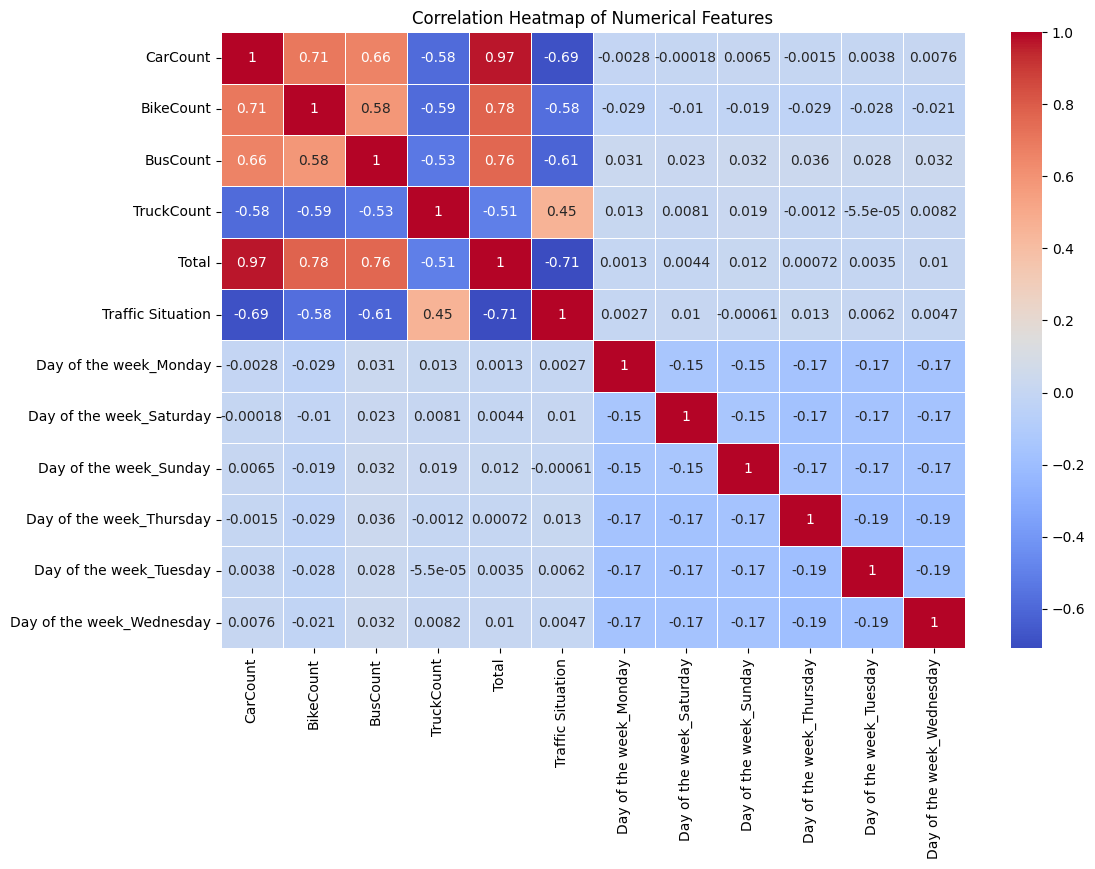

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CarCount                   6324 non-null   float64
 1   BikeCount                  6324 non-null   float64
 2   BusCount                   6324 non-null   float64
 3   TruckCount                 6324 non-null   float64
 4   Total                      6324 non-null   float64
 5   Traffic Situation          6324 non-null   float64
 6   Day of the week_Monday     6324 non-null   bool   
 7   Day of the week_Saturday   6324 non-null   bool   
 8   Day of the week_Sunday     6324 non-null   bool   
 9   Day of the week_Thursday   6324 non-null   bool   
 10  Day of the week_Tuesday    6324 non-null   bool   
 11  Day of the week_Wednesday  6324 non-null   bool   
dtypes: bool(6), float64(6)
memory usage: 333.6 KB


In [24]:
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and Train the Classifiers

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [18]:
df['Traffic Situation'] = pd.cut(df['Traffic Situation'], bins=3, labels=['Low', 'Medium', 'High'])

y = df['Traffic Situation']


In [21]:
bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

### Evaluate the model performance

In [26]:
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.899604743083004
Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.91      0.92       794
         Low       0.93      0.93      0.93       322
      Medium       0.70      0.77      0.73       149

    accuracy                           0.90      1265
   macro avg       0.85      0.87      0.86      1265
weighted avg       0.90      0.90      0.90      1265



In [27]:
print("Bagging Classifier Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_bagging) * 100))

Bagging Classifier Accuracy: 89.96%


In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(bagging_clf,X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

Cross-Validation Accuracy: 89.84%


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [32]:
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [33]:
y_pred_boosting = boosting_clf.predict(X_test)
print("Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Classification Report:\n", classification_report(y_test, y_pred_boosting))


Boosting Classifier Accuracy: 0.9225296442687747
Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.93      0.94       794
         Low       0.96      0.94      0.95       322
      Medium       0.73      0.87      0.79       149

    accuracy                           0.92      1265
   macro avg       0.88      0.91      0.89      1265
weighted avg       0.93      0.92      0.92      1265



In [34]:
print("Boosting Classifier Accuracy:{:.2f}%".format(accuracy_score(y_test, y_pred_boosting) * 100))

Boosting Classifier Accuracy:92.25%


In [35]:
cv_scores = cross_val_score(boosting_clf,X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

Cross-Validation Accuracy: 91.86%


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [36]:
base_learners = [
    ('bagging', bagging_clf),
    ('boosting', boosting_clf),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

### Define meta-learner (LogisticRegression)

In [37]:
meta_learner = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [38]:
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging',
                                BaggingClassifier(n_estimators=100,
                                                  random_state=42)),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [39]:
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))


Stacking Classifier Accuracy: 0.9652173913043478
Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.97      0.97       794
         Low       0.98      0.96      0.97       322
      Medium       0.89      0.96      0.92       149

    accuracy                           0.97      1265
   macro avg       0.95      0.96      0.95      1265
weighted avg       0.97      0.97      0.97      1265



In [40]:
print("Stacking Classifier Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_stack) * 100))

Stacking Classifier Accuracy: 96.52%


In [41]:
cv_scores = cross_val_score(stacking_clf,X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

Cross-Validation Accuracy: 95.08%


In [42]:
df.columns

Index(['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Traffic Situation', 'Day of the week_Monday',
       'Day of the week_Saturday', 'Day of the week_Sunday',
       'Day of the week_Thursday', 'Day of the week_Tuesday',
       'Day of the week_Wednesday'],
      dtype='object')

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:


**Important** **features**:include CarCount, TruckCount, and Total they directly relate to traffic density.


**Ensemble** **methods** : Bagging and Boosting chosen for their ability to reduce variance and bias.
Stacking combines multiple models to leverage their strengths,
usually improves overall performance.



**Metrics**:accuracy, precision, recall, and F1-score are used to assess performance.
These provide insights into model balance between predicting true positives and avoiding false negatives.